# Data Preparation 2

This notebook consist in the second data preparation. Instances of admission Height and Weight measures available corresponding to each ICUSTAY_ID from CHARTEVENTS.db database created in the first notebook (DataPreparation_1) are taken and converted to pandas Dataframe in order to fill the desired features in the main file MAIN_DF.csv. This features are selected via ITEMID. Then Body Mass Index (BMI) is computed from this two features.

This example is the ilustration of the process that will be more automatic in the following notebooks. The goal is to create a rich Dataframe of features for each given admission to the ICU with ICUSTAY_ID identification.

In [163]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import pylab
matplotlib.style.use('ggplot')

Take the file created in DataPreparation_1

In [164]:
admissions=pd.read_csv('MAIN_DF.csv')
admissions=admissions.drop(['Unnamed: 0'], axis=1)
admissions=admissions.reset_index(drop=True)
print(admissions.shape)
print('unique SUBJECT_ID:', admissions.SUBJECT_ID.nunique())
print('unique HADM_ID   :', admissions.HADM_ID.nunique())
print('unique ICUSTAY_ID:', admissions.ICUSTAY_ID.nunique())
admissions.head()

(51518, 21)
unique SUBJECT_ID: 37778
unique HADM_ID   : 48372
unique ICUSTAY_ID: 51518


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,...,DBSOURCE,FIRST_CAREUNIT,FIRST_WARDID,INTIME,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG
0,3,145834,211552,M,76.53,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,Medicare,WHITE,...,carevue,MICU,12,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,>4,10.78,>10,0
1,4,185777,294638,F,47.84,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,Private,WHITE,...,carevue,MICU,52,2191-03-16 00:29:31,2191-03-17 16:46:31,1.6785,1-2,7.76,6-10,0
2,6,107064,228232,F,65.94,2175-05-30 07:15:00,2175-06-15 16:00:00,ELECTIVE,Medicare,WHITE,...,carevue,SICU,33,2175-05-30 21:30:54,2175-06-03 13:39:54,3.6729,2-4,16.36,>10,0
3,9,150750,220597,M,41.79,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,Medicaid,NW,...,carevue,MICU,15,2149-11-09 13:07:02,2149-11-14 20:52:14,5.3231,>4,4.88,3-6,1
4,11,194540,229441,F,50.15,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,Private,WHITE,...,carevue,SICU,57,2178-04-16 06:19:32,2178-04-17 20:21:05,1.5844,1-2,25.53,>10,0


Define the connexion to the database where we are going to take the desired instances

In [165]:
connex = sqlite3.connect("data/CHARTEVENTS.db")
cur = connex.cursor()

Height in centimeters extraction.

From D_ITEMS.csv file we can link each ITEMID to a measure of a concrete variable or feature

For the Height in centimeters its ITEMID is 226730 (I took the ITEMID with more number of observations)

In [166]:
ids = [226730]
ids = [str(id) for id in ids] 
str_matching = "(" + ",".join(ids) + ")"
print(str_matching)

(226730)


In [167]:
sql = "SELECT * FROM CHARTEVENTS_DB WHERE ITEMID IN " + str_matching + ";"
print('String of SQL   :', sql)
print('Object Execution:', cur.execute(sql))

String of SQL   : SELECT * FROM CHARTEVENTS_DB WHERE ITEMID IN (226730);
Object Execution: <sqlite3.Cursor object at 0x7f1d90420500>


In [168]:
df_226730 = pd.read_sql_query(sql, connex)
print(df_226730.shape)
print('unique ICUSTAY_ID:', df_226730.ICUSTAY_ID.nunique())
df_226730.head()

(12015, 15)
unique ICUSTAY_ID: 12011


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,443,34,144319,290505.0,226730,2191-02-23 11:25:00,2191-02-23 11:25:00,15173.0,165.0,165.0,cm,0,0,None,None
1,1981,36,165660,241249.0,226730,2134-05-16 10:58:00,2134-05-16 10:58:00,16223.0,180.0,180.0,cm,0,0,None,None
2,3010,107,174162,264253.0,226730,2122-05-15 23:40:00,2122-05-15 23:40:00,17114.0,168.0,168.0,cm,0,0,None,None
3,3406,109,147469,253139.0,226730,2141-06-11 21:27:00,2141-06-11 21:27:00,17248.0,152.0,152.0,cm,0,0,None,None
4,4328,109,131345,243978.0,226730,2141-09-05 22:15:00,2141-09-05 22:15:00,19937.0,150.0,150.0,cm,0,0,None,None


In [169]:
df_226730.VALUEUOM.value_counts()

cm    12015
Name: VALUEUOM, dtype: int64

In [170]:
df_226730.isnull().sum()

ROW_ID              0
SUBJECT_ID          0
HADM_ID             0
ICUSTAY_ID          3
ITEMID              0
CHARTTIME           0
STORETIME           0
CGID                0
VALUE               0
VALUENUM            0
VALUEUOM            0
WARNING             0
ERROR               0
RESULTSTATUS    12015
STOPPED         12015
dtype: int64

In [171]:
df_226730=df_226730[df_226730['ERROR']==0]
df_226730=df_226730.drop(['ROW_ID', 'ITEMID', 'STORETIME', 'CGID', 'VALUENUM', 'VALUEUOM', 'WARNING', 
                                'ERROR', 'RESULTSTATUS', 'STOPPED'], axis=1)

In [172]:
df_226730=df_226730.rename({'CHARTTIME':'HEIGHT_T', 'VALUE':'HEIGHT'}, axis='columns')
print(df_226730.shape)
df_226730.head()

(12015, 5)


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,HEIGHT_T,HEIGHT
0,34,144319,290505.0,2191-02-23 11:25:00,165.0
1,36,165660,241249.0,2134-05-16 10:58:00,180.0
2,107,174162,264253.0,2122-05-15 23:40:00,168.0
3,109,147469,253139.0,2141-06-11 21:27:00,152.0
4,109,131345,243978.0,2141-09-05 22:15:00,150.0


Merge with the original file conserving the keys of the original file. This is because the second new file doesn't contain values for some ICUSTAY_ID

In [173]:
admissions=pd.merge(admissions,df_226730,how='left',on=['SUBJECT_ID', 'HADM_ID','ICUSTAY_ID'])
print(admissions.shape)
admissions=admissions.sort_values(by=['HEIGHT_T'])
admissions=admissions.reset_index(drop=True)
admissions.head()

(51519, 23)


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,...,FIRST_WARDID,INTIME,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG,HEIGHT_T,HEIGHT
0,41552,120254,268176,M,72.110000,2100-07-05 13:52:00,2100-07-08 15:45:00,EMERGENCY,Private,NW,...,52,2100-07-06 13:59:09,2100-07-07 15:11:01,1.0499,1-2,3.08,3-6,0,2100-07-06 16:04:00,157.0
1,31288,136246,250905,F,98.738578,2100-07-16 11:29:00,2100-07-22 18:00:00,EMERGENCY,Medicare,WHITE,...,14,2100-07-16 11:30:04,2100-07-17 16:31:25,1.2093,1-2,6.27,6-10,0,2100-07-16 17:15:00,160.0
2,71582,101422,218983,M,76.480000,2100-07-16 18:09:00,2100-07-24 20:07:00,EMERGENCY,Medicare,NW,...,12,2100-07-20 09:07:25,2100-07-21 11:03:26,1.0806,1-2,8.08,6-10,0,2100-07-20 11:21:00,160.0
3,31263,198779,278147,M,18.540000,2100-07-18 23:51:00,2100-07-27 12:54:00,EMERGENCY,Medicaid,NW,...,14,2100-07-18 23:52:23,2100-07-23 16:49:17,4.7062,>4,8.54,6-10,0,2100-07-20 16:43:00,168.0
4,51754,153020,235889,M,45.050000,2100-07-27 18:12:00,2100-07-31 01:25:00,EMERGENCY,Private,WHITE,...,23,2100-07-27 18:13:04,2100-07-31 13:25:27,3.8003,2-4,3.30,3-6,0,2100-07-27 18:37:00,188.0


In [174]:
admissions=admissions.drop_duplicates('ICUSTAY_ID')

In [175]:
admissions.shape

(51518, 23)

Weight admission in kilograms extraction

In [176]:
ids = [226512]
ids = [str(id) for id in ids] 
str_matching = "(" + ",".join(ids) + ")"
print(str_matching)

(226512)


In [177]:
sql = "SELECT * FROM CHARTEVENTS_DB WHERE ITEMID IN " + str_matching + ";"
print('String of SQL   :', sql)
print('Object Execution:', cur.execute(sql))

String of SQL   : SELECT * FROM CHARTEVENTS_DB WHERE ITEMID IN (226512);
Object Execution: <sqlite3.Cursor object at 0x7f1d90420500>


In [178]:
df_226512 = pd.read_sql_query(sql, connex)
print(df_226512.shape)
print('unique ICUSTAY_ID:', df_226512.ICUSTAY_ID.nunique())
df_226512.head()

(22604, 15)
unique ICUSTAY_ID: 22597


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,355,34,144319,290505.0,226512,2191-02-23 07:44:00,2191-02-23 07:44:00,17741.0,74.5,74.5,kg,0,0,None,None
1,8,23,124321,234044.0,226512,2157-10-21 12:15:00,2157-10-21 12:15:00,16978.0,66.8,66.8,kg,0,0,None,None
2,1978,36,165660,241249.0,226512,2134-05-16 10:58:00,2134-05-16 10:58:00,16223.0,106.2,106.2,kg,0,0,None,None
3,2029,85,112077,291697.0,226512,2167-07-25 21:31:00,2167-07-25 21:31:00,21050.0,98.0,98.0,kg,0,0,None,None
4,2505,107,182383,252542.0,226512,2121-12-01 05:54:00,2121-12-01 05:54:00,16526.0,88.6,88.6,kg,0,0,None,None


In [179]:
df_226512.VALUEUOM.value_counts()

kg    22604
Name: VALUEUOM, dtype: int64

Weight admission in lb extraction and convert to Kg (we want more observations)

In [180]:
ids = [226531]
ids = [str(id) for id in ids] 
str_matching = "(" + ",".join(ids) + ")"
sql = "SELECT * FROM CHARTEVENTS_DB WHERE ITEMID IN " + str_matching + ";"
print('String of SQL   :', sql)
print('Object Execution:', cur.execute(sql))
df_226531 = pd.read_sql_query(sql, connex)
df_226531['VALUE'] = np.round(df_226531['VALUE'].apply(lambda x: x*(0.453592)),1)
print(df_226531.shape)
print('unique ICUSTAY_ID:', df_226531.ICUSTAY_ID.nunique())
df_226531.head()

String of SQL   : SELECT * FROM CHARTEVENTS_DB WHERE ITEMID IN (226531);
Object Execution: <sqlite3.Cursor object at 0x7f1d90420500>
(46255, 15)
unique ICUSTAY_ID: 19643


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,356,34,144319,290505.0,226531,2191-02-23 07:44:00,2191-02-23 07:44:00,17741.0,74.3,163.9,None,0,0,None,None
1,268,23,124321,234044.0,226531,2157-10-22 10:43:00,2157-10-22 10:43:00,21253.0,66.7,147.0,None,0,0,None,None
2,666,34,144319,290505.0,226531,2191-02-24 15:10:00,2191-02-24 15:10:00,17166.0,74.3,163.9,None,0,0,None,None
3,441,34,144319,290505.0,226531,2191-02-23 11:25:00,2191-02-23 11:25:00,15173.0,74.3,163.9,None,0,0,None,None
4,1979,36,165660,241249.0,226531,2134-05-16 10:58:00,2134-05-16 10:58:00,16223.0,106.0,233.6,None,0,0,None,None


In [181]:
frames = [df_226512, df_226531]
mmm = pd.concat(frames)
print('unique ICUSTAY_ID:', mmm.ICUSTAY_ID.nunique())

unique ICUSTAY_ID: 23142


In [182]:
mmm=mmm[mmm['ERROR']==0]
mmm=mmm.drop(['ROW_ID', 'ITEMID', 'STORETIME', 'CGID', 'VALUENUM', 'VALUEUOM', 'WARNING', 
                                'ERROR', 'RESULTSTATUS', 'STOPPED'], axis=1)

In [183]:
mmm=mmm.rename({'CHARTTIME':'WEIGHT_T', 'VALUE':'WEIGHT'}, axis='columns')
mmm=mmm.sort_values(by=['WEIGHT_T'])
mmm=mmm.drop_duplicates('ICUSTAY_ID')
print(mmm.shape)
print('unique ICUSTAY_ID:', mmm.ICUSTAY_ID.nunique())
mmm.head()

(23143, 5)
unique ICUSTAY_ID: 23142


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,WEIGHT_T,WEIGHT
16893,82574,118464,202134.0,2100-06-08 00:21:00,74.5
3115,31585,125380,234741.0,2100-07-03 01:49:00,87.0
16269,79168,125272,293960.0,2100-07-06 15:10:00,126.8
8577,41552,120254,268176.0,2100-07-06 16:04:00,74.8
28622,72723,146616,267483.0,2100-07-09 16:18:00,78.8


In [184]:
admissions=pd.merge(admissions,mmm,how='left',on=['SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID'])
print(admissions.shape)
admissions=admissions.sort_values(by=['WEIGHT_T'])
admissions=admissions.drop_duplicates('ICUSTAY_ID')
admissions=admissions.reset_index(drop=True)
admissions.head()

(51518, 25)


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,...,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG,HEIGHT_T,HEIGHT,WEIGHT_T,WEIGHT
0,82574,118464,202134,M,56.120000,2100-06-07 19:59:00,2100-06-09 17:09:00,EMERGENCY,Medicaid,NW,...,2100-06-08 14:59:31,0.7911,0-1,1.88,0-3,0,NaN,NaN,2100-06-08 00:21:00,74.5
1,31585,125380,234741,M,92.639943,2100-07-02 19:28:00,2100-07-07 18:05:00,EMERGENCY,Private,WHITE,...,2100-07-04 01:57:28,1.1458,1-2,4.94,3-6,0,NaN,NaN,2100-07-03 01:49:00,87.0
2,79168,125272,293960,F,60.640000,2100-07-05 15:22:00,2100-07-27 17:00:00,EMERGENCY,Private,WHITE,...,2100-07-15 13:14:41,8.9252,>4,22.07,>10,0,NaN,NaN,2100-07-06 15:10:00,126.8
3,41552,120254,268176,M,72.110000,2100-07-05 13:52:00,2100-07-08 15:45:00,EMERGENCY,Private,NW,...,2100-07-07 15:11:01,1.0499,1-2,3.08,3-6,0,2100-07-06 16:04:00,157.0,2100-07-06 16:04:00,74.8
4,72723,146616,267483,M,21.900000,2100-07-09 10:43:00,2100-07-17 15:00:00,EMERGENCY,Private,WHITE,...,2100-07-10 16:19:58,1.1252,1-2,8.18,6-10,0,NaN,NaN,2100-07-09 16:18:00,78.8


In [185]:
a_h=pd.to_datetime(admissions.HEIGHT_T)-pd.to_datetime(admissions.INTIME)
a_w=pd.to_datetime(admissions.WEIGHT_T)-pd.to_datetime(admissions.INTIME)
admissions.HEIGHT_T=np.round(a_h.dt.total_seconds()/86400, 2)
admissions.WEIGHT_T=np.round(a_w.dt.total_seconds()/86400, 2)

In [186]:
admissions[admissions['SUBJECT_ID']==23].sort_values(by=['ICUSTAY_ID'])

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,...,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG,HEIGHT_T,HEIGHT,WEIGHT_T,WEIGHT
22605,23,152223,227807,M,71.13,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,Medicare,WHITE,...,2153-09-04 15:59:11,1.2641,1-2,5.50,3-6,0,NaN,NaN,NaN,NaN
12642,23,124321,234044,M,75.26,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,Medicare,WHITE,...,2157-10-22 16:08:48,1.1862,1-2,6.77,6-10,0,NaN,NaN,0.02,66.8


In [187]:
admissions[admissions['SUBJECT_ID']==109].sort_values(by=['ICUSTAY_ID'])

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,...,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG,HEIGHT_T,HEIGHT,WEIGHT_T,WEIGHT
22677,109,183350,208379,F,20.27,2137-11-04 19:36:00,2137-11-21 18:13:00,EMERGENCY,Government,NW,...,2137-11-20 22:38:41,6.0769,>4,16.94,>10,0,NaN,NaN,NaN,NaN
9249,109,196721,214027,F,24.93,2142-07-12 15:27:00,2142-07-23 18:41:00,EMERGENCY,Medicaid,NW,...,2142-07-15 20:45:04,3.2197,2-4,11.13,>10,0,NaN,NaN,0.08,50.1
9252,109,196721,217934,F,24.94,2142-07-12 15:27:00,2142-07-23 18:41:00,EMERGENCY,Medicaid,NW,...,2142-07-18 20:28:26,1.5276,1-2,11.13,>10,0,NaN,NaN,0.02,50.1
9200,109,151240,219154,F,24.77,2142-05-15 10:45:00,2142-05-18 15:58:00,EMERGENCY,Medicaid,NW,...,2142-05-16 10:44:24,0.9986,0-1,3.22,3-6,0,NaN,NaN,0.07,41.9
22683,109,110668,221610,F,23.05,2140-08-25 14:39:00,2140-09-02 18:30:00,EMERGENCY,Medicaid,NW,...,2140-08-31 23:34:12,6.3704,>4,8.16,6-10,0,NaN,NaN,NaN,NaN
9108,109,140167,222630,F,24.36,2141-12-18 03:50:00,2141-12-23 19:51:00,EMERGENCY,Medicaid,NW,...,2141-12-23 01:51:57,4.9176,>4,5.67,3-6,0,1.23,152.0,0.05,47.6
22676,109,175347,231823,F,22.78,2140-05-17 14:27:00,2140-05-20 19:50:00,EMERGENCY,Medicaid,NW,...,2140-05-19 21:23:15,2.2876,2-4,3.22,3-6,0,NaN,NaN,NaN,NaN
9210,109,102024,232807,F,24.82,2142-05-20 12:59:00,2142-06-05 16:18:00,EMERGENCY,Medicaid,NW,...,2142-06-03 14:41:49,1.8273,1-2,16.14,>10,0,0.40,152.0,0.17,45.0
9075,109,126055,236124,F,24.19,2141-10-13 23:10:00,2141-11-03 18:45:00,EMERGENCY,Medicaid,NW,...,2141-10-25 20:49:04,11.9014,>4,20.82,>10,0,NaN,NaN,0.07,49.6
9097,109,161950,237552,F,24.30,2141-11-24 16:11:00,2141-12-01 19:00:00,EMERGENCY,Medicaid,NW,...,2141-11-26 21:51:50,2.2359,2-4,7.12,6-10,0,NaN,NaN,0.08,46.2


In [188]:
admissions=admissions.sort_values(by=['SUBJECT_ID'])
admissions=admissions.reset_index(drop=True)

In [189]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
DBSOURCE                    0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
HEIGHT_T                39897
HEIGHT                  39897
WEIGHT_T                28939
WEIGHT                  28939
dtype: int64

In order to fill some NaN we can group by SUBJECT_ID and replace NaN that a given SUBJECT_ID can have for different HADM_ID and/or ICUSTAY_ID for the value of some operation of the available values for a given feature.

For the weight I use the mean, for the height I use the most frequent value (more realistic)

Group by SUBJECT_ID and replace NaN

But first, replace outliers by NaN

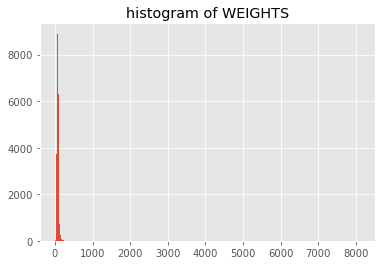

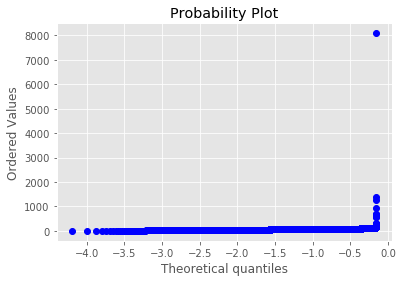

In [190]:
admissions['WEIGHT'].hist(bins=400)
plt.title('histogram of WEIGHTS')
plt.show()
stats.probplot(admissions['WEIGHT'], dist="norm", plot=pylab, rvalue=False)
pylab.show()

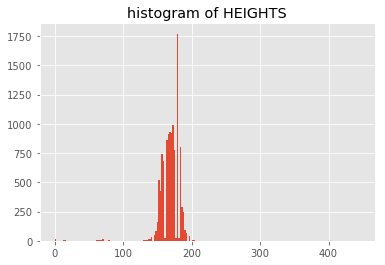

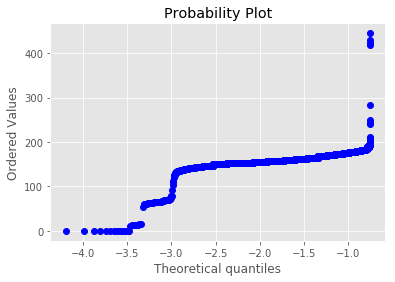

In [191]:
admissions['HEIGHT'].hist(bins=200)
plt.title('histogram of HEIGHTS')
plt.show()
stats.probplot(admissions['HEIGHT'], dist="norm", plot=pylab, rvalue=False)
pylab.show()

In [192]:
admissions['WEIGHT']=admissions['WEIGHT'].mask(admissions['WEIGHT'].abs().gt(180))
admissions['WEIGHT']=admissions['WEIGHT'].mask(admissions['WEIGHT'].abs().lt(25))
admissions['HEIGHT']=admissions['HEIGHT'].mask(admissions['HEIGHT'].abs().gt(210))
admissions['HEIGHT']=admissions['HEIGHT'].mask(admissions['HEIGHT'].abs().lt(140))
#admissions['WEIGHT']=admissions['WEIGHT'].mask(admissions['WEIGHT'].sub(admissions['WEIGHT'].median()).
#                                               div(admissions['WEIGHT'].std()).abs().gt(3))
#admissions['HEIGHT']=admissions['HEIGHT'].mask(admissions['HEIGHT'].sub(admissions['HEIGHT'].median()).
#                                               div(admissions['HEIGHT'].std()).abs().gt(3))

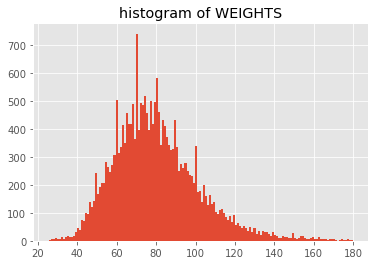

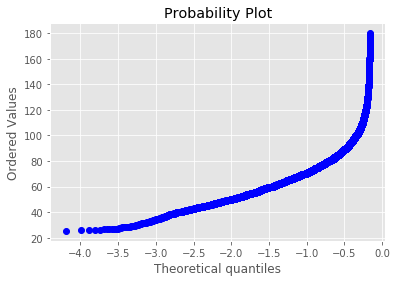

In [193]:
admissions['WEIGHT'].hist(bins=150)
plt.title('histogram of WEIGHTS')
plt.show()
stats.probplot(admissions['WEIGHT'], dist="norm", plot=pylab, rvalue=False)
pylab.show()

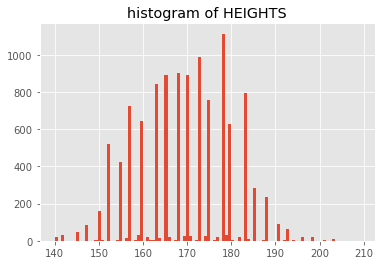

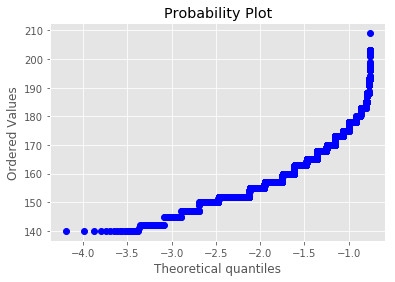

In [194]:
admissions['HEIGHT'].hist(bins=100)
plt.title('histogram of HEIGHTS')
plt.show()
stats.probplot(admissions['HEIGHT'], dist="norm", plot=pylab, rvalue=False)
pylab.show()

In [195]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
DBSOURCE                    0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
HEIGHT_T                39897
HEIGHT                  40016
WEIGHT_T                28939
WEIGHT                  29091
dtype: int64

In [196]:
admissions['WEIGHT'] = admissions['WEIGHT'].groupby(admissions['SUBJECT_ID']).transform(
    lambda x: x.fillna(np.round(x.mean(),1)))
admissions['HEIGHT'] = admissions['HEIGHT'].groupby(admissions['SUBJECT_ID']).transform(
    lambda x: x.fillna(x.value_counts().idxmax() if x.value_counts().max() >=1 else x , inplace = False))

In [197]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
DBSOURCE                    0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
HEIGHT_T                39897
HEIGHT                  35092
WEIGHT_T                28939
WEIGHT                  25880
dtype: int64

As we can see, we have replaced some NaN by reasonable numbers

In [198]:
admissions[admissions['SUBJECT_ID']==23].sort_values(by=['ICUSTAY_ID'])

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,...,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG,HEIGHT_T,HEIGHT,WEIGHT_T,WEIGHT
15,23,152223,227807,M,71.13,2153-09-03 07:15:00,2153-09-08 19:10:00,ELECTIVE,Medicare,WHITE,...,2153-09-04 15:59:11,1.2641,1-2,5.50,3-6,0,NaN,NaN,NaN,66.8
16,23,124321,234044,M,75.26,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,Medicare,WHITE,...,2157-10-22 16:08:48,1.1862,1-2,6.77,6-10,0,NaN,NaN,0.02,66.8


In [199]:
admissions[admissions['SUBJECT_ID']==109].sort_values(by=['ICUSTAY_ID'])

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,...,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG,HEIGHT_T,HEIGHT,WEIGHT_T,WEIGHT
118,109,183350,208379,F,20.27,2137-11-04 19:36:00,2137-11-21 18:13:00,EMERGENCY,Government,NW,...,2137-11-20 22:38:41,6.0769,>4,16.94,>10,0,NaN,152.0,NaN,47.5
124,109,196721,214027,F,24.93,2142-07-12 15:27:00,2142-07-23 18:41:00,EMERGENCY,Medicaid,NW,...,2142-07-15 20:45:04,3.2197,2-4,11.13,>10,0,NaN,152.0,0.08,50.1
123,109,196721,217934,F,24.94,2142-07-12 15:27:00,2142-07-23 18:41:00,EMERGENCY,Medicaid,NW,...,2142-07-18 20:28:26,1.5276,1-2,11.13,>10,0,NaN,152.0,0.02,50.1
90,109,151240,219154,F,24.77,2142-05-15 10:45:00,2142-05-18 15:58:00,EMERGENCY,Medicaid,NW,...,2142-05-16 10:44:24,0.9986,0-1,3.22,3-6,0,NaN,152.0,0.07,41.9
116,109,110668,221610,F,23.05,2140-08-25 14:39:00,2140-09-02 18:30:00,EMERGENCY,Medicaid,NW,...,2140-08-31 23:34:12,6.3704,>4,8.16,6-10,0,NaN,152.0,NaN,47.5
99,109,140167,222630,F,24.36,2141-12-18 03:50:00,2141-12-23 19:51:00,EMERGENCY,Medicaid,NW,...,2141-12-23 01:51:57,4.9176,>4,5.67,3-6,0,1.23,152.0,0.05,47.6
110,109,175347,231823,F,22.78,2140-05-17 14:27:00,2140-05-20 19:50:00,EMERGENCY,Medicaid,NW,...,2140-05-19 21:23:15,2.2876,2-4,3.22,3-6,0,NaN,152.0,NaN,47.5
109,109,102024,232807,F,24.82,2142-05-20 12:59:00,2142-06-05 16:18:00,EMERGENCY,Medicaid,NW,...,2142-06-03 14:41:49,1.8273,1-2,16.14,>10,0,0.40,152.0,0.17,45.0
102,109,126055,236124,F,24.19,2141-10-13 23:10:00,2141-11-03 18:45:00,EMERGENCY,Medicaid,NW,...,2141-10-25 20:49:04,11.9014,>4,20.82,>10,0,NaN,152.0,0.07,49.6
98,109,161950,237552,F,24.30,2141-11-24 16:11:00,2141-12-01 19:00:00,EMERGENCY,Medicaid,NW,...,2141-11-26 21:51:50,2.2359,2-4,7.12,6-10,0,NaN,152.0,0.08,46.2


In [200]:
admissions=admissions.drop(['HEIGHT_T', 'WEIGHT_T'], axis=1)
admissions['BMI'] = np.round((admissions['WEIGHT']/(admissions['HEIGHT']*admissions['HEIGHT']/10000)), 1)
#admissions['BMI'] = admissions['BMI'].groupby(admissions['SUBJECT_ID']).transform(lambda x: x.fillna(x.mean()))

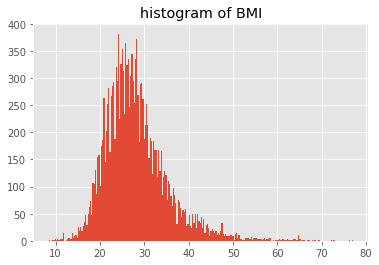

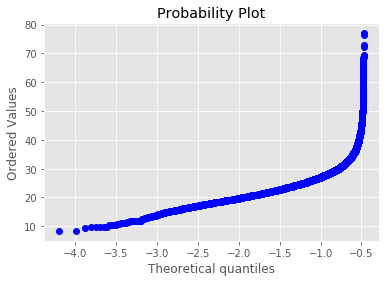

In [201]:
admissions['BMI'].hist(bins=250)
plt.title('histogram of BMI')
plt.show()
stats.probplot(admissions['BMI'], dist="norm", plot=pylab, rvalue=False)
pylab.show()

In [202]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
DBSOURCE                    0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
HEIGHT                  35092
WEIGHT                  25880
BMI                     35164
dtype: int64

In [203]:
admissions.head()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,...,INTIME,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG,HEIGHT,WEIGHT,BMI
0,3,145834,211552,M,76.53,2101-10-20 19:08:00,2101-10-31 13:58:00,EMERGENCY,Medicare,WHITE,...,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646,>4,10.78,>10,0,NaN,NaN,NaN
1,4,185777,294638,F,47.84,2191-03-16 00:28:00,2191-03-23 18:41:00,EMERGENCY,Private,WHITE,...,2191-03-16 00:29:31,2191-03-17 16:46:31,1.6785,1-2,7.76,6-10,0,NaN,NaN,NaN
2,6,107064,228232,F,65.94,2175-05-30 07:15:00,2175-06-15 16:00:00,ELECTIVE,Medicare,WHITE,...,2175-05-30 21:30:54,2175-06-03 13:39:54,3.6729,2-4,16.36,>10,0,NaN,NaN,NaN
3,9,150750,220597,M,41.79,2149-11-09 13:06:00,2149-11-14 10:15:00,EMERGENCY,Medicaid,NW,...,2149-11-09 13:07:02,2149-11-14 20:52:14,5.3231,>4,4.88,3-6,1,NaN,NaN,NaN
4,11,194540,229441,F,50.15,2178-04-16 06:18:00,2178-05-11 19:00:00,EMERGENCY,Private,WHITE,...,2178-04-16 06:19:32,2178-04-17 20:21:05,1.5844,1-2,25.53,>10,0,NaN,NaN,NaN


In [204]:
admissions.to_csv('MAIN_DF_2.csv')